In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from statsmodels.tsa.api import ExponentialSmoothing

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

In [5]:
df.head()

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
df.describe()

,y
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [11]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [13]:
# ARIMA Model
arima_model = ARIMA(train, order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=12)

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
# Prophet Model
prophet_df = train.reset_index().rename(columns={'ds': 'ds', 'y': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
prophet_forecast = prophet_model.predict(future)
prophet_forecast = prophet_forecast['yhat'][-12:].values

14:45:52 - cmdstanpy - INFO - Chain [1] start processing
14:45:54 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ADMIN\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [17]:
# Simple Exponential Smoothing
ses_model = ExponentialSmoothing(train, trend=None, seasonal=None, seasonal_periods=None)
ses_fit = ses_model.fit()
ses_forecast = ses_fit.forecast(steps=12)

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [19]:
# Ensemble Forecast
ensemble_forecast = (arima_forecast.values + prophet_forecast + ses_forecast.values) / 3

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17192\2721463995.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=train.index[-1] + pd.DateOffset(1), periods=12, freq='M'), arima_forecast, label='ARIMA Forecast', linestyle='--')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17192\2721463995.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=train.index[-1] + pd.DateOffset(1), periods=12, freq='M'), prophet_forecast, label='Prophet Forecast', linestyle='--')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17192\2721463995.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=train.index[-1] + pd.DateOffset(1), periods=12, freq='M'), ses_forecast, label='SES Forecast', linestyle='--')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17192\2721463995.py:

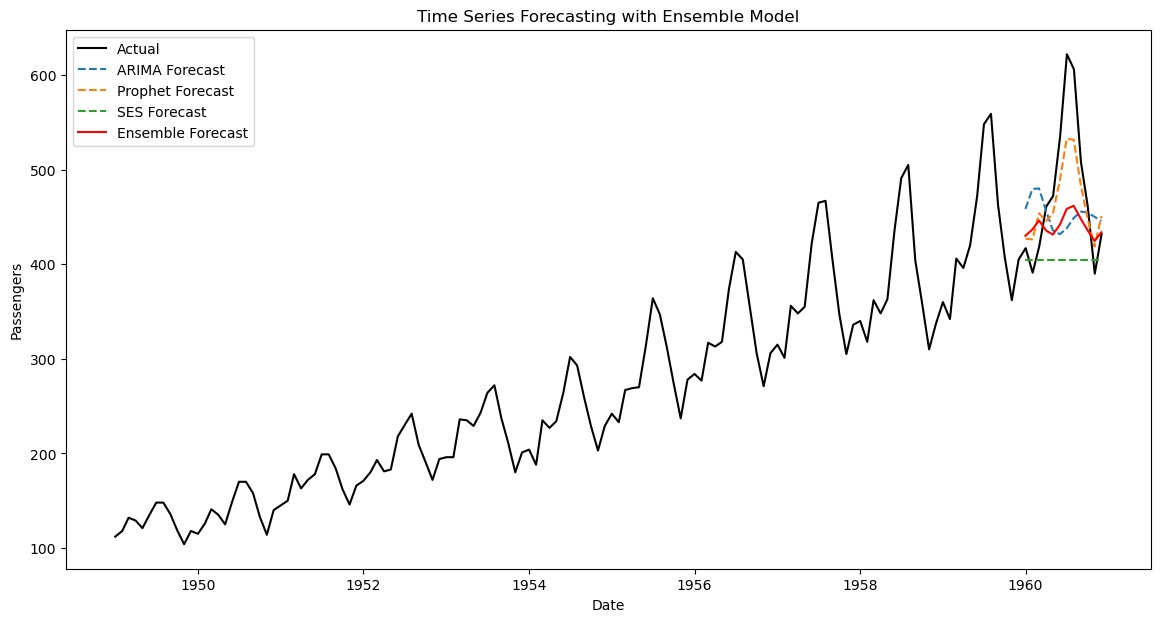

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['y'], label='Actual', color='black')
plt.plot(pd.date_range(start=train.index[-1] + pd.DateOffset(1), periods=12, freq='M'), arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(pd.date_range(start=train.index[-1] + pd.DateOffset(1), periods=12, freq='M'), prophet_forecast, label='Prophet Forecast', linestyle='--')
plt.plot(pd.date_range(start=train.index[-1] + pd.DateOffset(1), periods=12, freq='M'), ses_forecast, label='SES Forecast', linestyle='--')
plt.plot(pd.date_range(start=train.index[-1] + pd.DateOffset(1), periods=12, freq='M'), ensemble_forecast, label='Ensemble Forecast', linestyle='-', color='red')
plt.title('Time Series Forecasting with Ensemble Model')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()